Employee attrition scoring model

In [210]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [211]:
# Data collection: Loading the dataset
hr_data = pd.read_csv('./Dane/HR_Analytics.csv')

In [212]:
# General displaying settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [213]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [214]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [215]:
# Based on EDA results four features are dropped
hr_data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [216]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [217]:
# Feature selection: Target variable and explanatory variables
X = hr_data.drop('Attrition', axis=1)
y = hr_data['Attrition']

In [218]:
# Target variable transformation
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Yes -> 1, No -> 0

In [219]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [220]:
# Save the test set indices
test_indices = X_test.index

In [221]:
# Selecting categorical and numerical features
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [222]:
# Data processing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [223]:
# Apply the preprocessor to the training data
X_train_transformed = preprocessor.fit_transform(X_train)

In [224]:
# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

In [225]:
# Classification algorithm for feature selection
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))

In [226]:
# Model training pipeline
clf = Pipeline(steps=[
    ('feature_selector', feature_selector),
    ('classifier', LogisticRegression())
])

In [227]:
# Training the model
clf.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('feature_selector',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=42))),
                ('classifier', LogisticRegression())])

In [228]:
# Transform the test set
X_test_transformed = preprocessor.transform(X_test)

In [229]:
# Predicting on the test set
y_pred = clf.predict(X_test_transformed)
y_proba = clf.predict_proba(X_test_transformed)[:, 1]  # Probabilities for the positive class (1)

In [230]:
# Evaluating the model
roc_auc = roc_auc_score(y_test, y_proba)

print("AUC Score:", roc_auc)
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

AUC Score: 0.7343830888697153
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       380
           1       0.28      0.57      0.38        61

    accuracy                           0.74       441
   macro avg       0.60      0.67      0.61       441
weighted avg       0.83      0.74      0.77       441

Confusion matrix:
[[291  89]
 [ 26  35]]


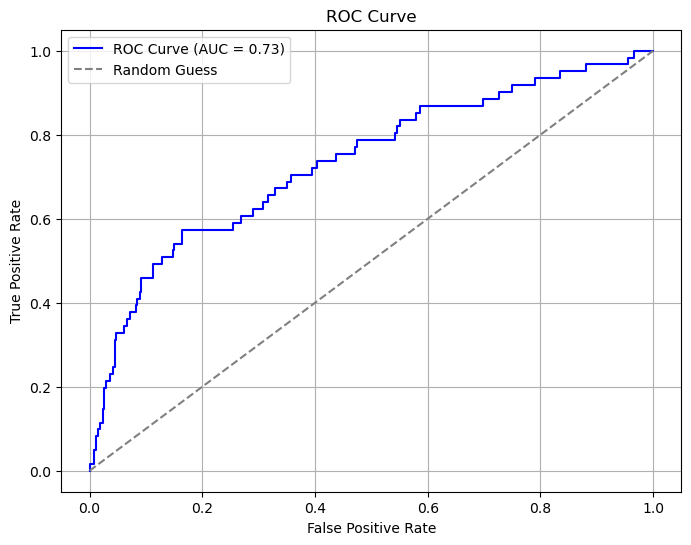

In [231]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [232]:
# Adding predicted probabilities to hr_data
hr_data['Attrition_Probability'] = np.nan  # Initialize a new column

# Assigning probabilities to the test set rows based on saved test indices
hr_data.loc[test_indices, 'Attrition_Probability'] = y_proba

# Display the updated dataframe
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

In [233]:
# Evaluating feature importance
feature_importances = feature_selector.estimator_.feature_importances_
features = numerical_features + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                              Feature  Importance
50                       OverTime_Yes    0.110972
49                        OverTime_No    0.082740
15                   StockOptionLevel    0.056326
16                  TotalWorkingYears    0.040874
7                            JobLevel    0.038547
9                       MonthlyIncome    0.037807
48               MaritalStatus_Single    0.035715
0                                 Age    0.035454
20                 YearsInCurrentRole    0.033999
19                     YearsAtCompany    0.027628
11                 NumCompaniesWorked    0.025670
22               YearsWithCurrManager    0.023910
2                    DistanceFromHome    0.023513
5                          HourlyRate    0.022694
8                     JobSatisfaction    0.021768
10                        MonthlyRate    0.021234
4             EnvironmentSatisfaction    0.020795
1                           DailyRate    0.020690
6                      JobInv

We can also prepare models based on other algorithms and compare the classification results.

In [247]:
# Models list to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

In [248]:
# Dictionary to store model performance
model_performance = {}

In [249]:
# Evaluate each model
for model_name, model in models.items():
    clf = Pipeline(steps=[
    ('feature_selector', feature_selector),
    ('classifier', model)
])
    clf.fit(X_train_balanced, y_train_balanced)

    y_pred = clf.predict(X_test_transformed)
    y_proba = clf.predict_proba(X_test_transformed)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC': auc
    }

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [250]:
# Print model performance
for model_name, metrics in model_performance.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f" {metric}: {value:.4f}")
    print()

Model: Logistic Regression
 Accuracy: 0.7392
 Precision: 0.2823
 Recall: 0.5738
 AUC: 0.7344

Model: Random Forest
 Accuracy: 0.8549
 Precision: 0.4595
 Recall: 0.2787
 AUC: 0.7560

Model: Gradient Boosting
 Accuracy: 0.8662
 Precision: 0.5208
 Recall: 0.4098
 AUC: 0.7635

Model: AdaBoost
 Accuracy: 0.8186
 Precision: 0.3492
 Recall: 0.3607
 AUC: 0.7413



c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


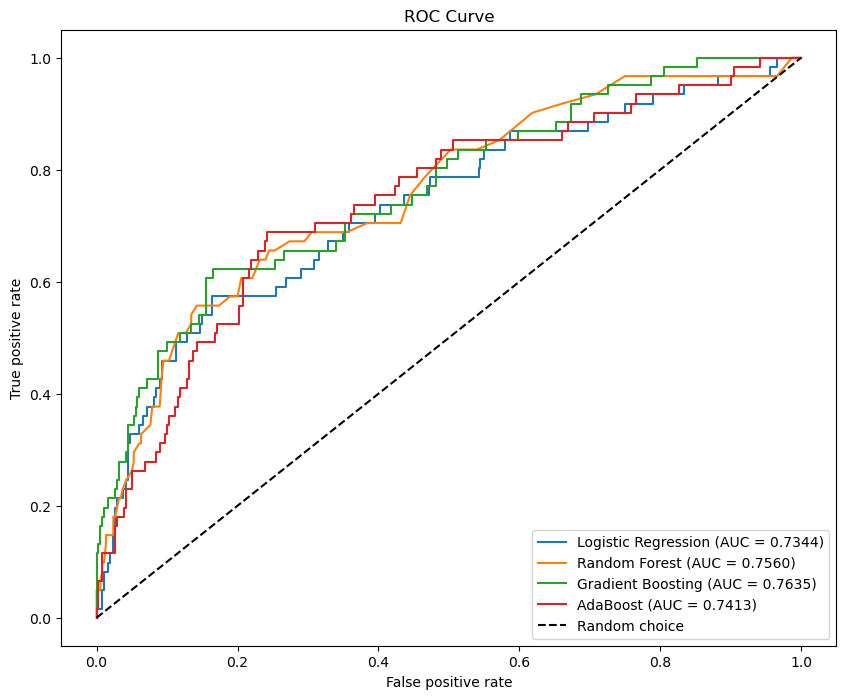

In [258]:
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    clf = Pipeline(steps=[
    ('feature_selector', feature_selector),
    ('classifier', model)
])
    clf.fit(X_train_balanced, y_train_balanced)
    
    y_proba = clf.predict_proba(X_test_transformed)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_proba):.4f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random choice')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

The model comparison led us to conclude that the Gradient Boosting model provides the best classification results. Of course, further experimentation with algorithms, feature engineering and selection, hyperparameter optimization, and oversampling techniques is necessary to create the optimal model for employee attrition prediction. However, the developed logistic regression model reveals which variables have the greatest impact on the probability of an employee leaving the company and assigns a probability of attrition for each employee (and classifies them into one of two categories - at risk/not at risk of leaving). This model can be utilized by the HR department to prevent the attrition of the most valuable employees.